# QF620 Project Group 5 Part 4

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 999

# Part 4 (Dynamic Hedging)

In [3]:
S = 100
sigma = 0.2
r = 0.05
T = 1/12
K = 100

steps = 84
sim = 50000

In [4]:
def BlackScholesCall(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

In [5]:
c_0 = BlackScholesCall(S, K, r, sigma, T)

In [6]:
def simulate_Brownian_Motion(paths, steps, T):
    deltaT = T/steps
    t = np.linspace(0, T, steps+1)
    X = np.c_[np.zeros((paths, 1)),
              np.random.randn(paths, steps)]
    return t, np.cumsum(np.sqrt(deltaT) * X, axis=1)

In [7]:
def black_scholes_model_simulator(S, K, r, sigma, T, paths, steps):
    St = []
    t, W = simulate_Brownian_Motion(paths, steps, T)
    W = W.T
    for i in np.arange(steps+1):
        St.append(S*np.exp((r - 0.5*(sigma**2))*t[i] + sigma*W[i]))
    return t, St

In [8]:
def delta_psiBt(St, K, r, sigma, T, t):
    d1 = (np.log(St/K) + (r + 0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    d2 = d1 - sigma*np.sqrt(T-t)
    delta = norm.cdf(d1)
    psiBt = -K * np.exp(-r*(T-t)) * norm.cdf(d2)
    
    return delta, psiBt

In [9]:
def results(S, K, r, sigma, T, sim, steps):
    t, St = black_scholes_model_simulator(S, K, r, sigma, T, sim, steps)
    
    St = np.array(St)
    S_minus_K = np.maximum(St-K, 0)
    Bt = np.exp(r*(t))
    
    delta, psiBt = delta_psiBt(St.T, K, r, sigma, T, t.T)
    
    ## add here
    
    St_diff = St[1:,:] - St[:-1, :]
    Bt_diff = Bt[1:]-Bt[:-1]
    
    replication = delta.T[:-1, :] * St_diff + psiBt.T[:-1, :] * Bt_diff.reshape(len(Bt_diff), 1)
    hedge = replication.sum(axis = 0)
    
    pnl = hedge - S_minus_K[-1] + c_0
    
    plt.plot(figsize = (10,8))
    plt.hist(pnl, bins = 50, range = [-2,2], align='mid')
    plt.xlabel('Final P&L')
    plt.ylabel('Count')
    plt.title('Histogram for final P&L of hedging strategy for %.0f rebalancing trades' %steps)
    plt.show();

<ipython-input-8-5ab59a7325ec>:2: RuntimeWarning: divide by zero encountered in true_divide
  d1 = (np.log(St/K) + (r + 0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))


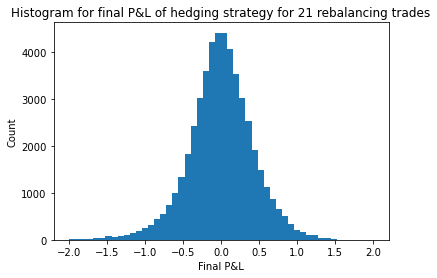

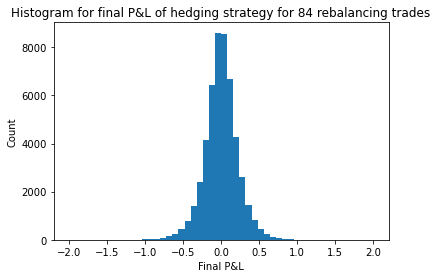

In [10]:
for steps in [21, 84]:
    results(S, K, r, sigma, T, sim, steps)